Qiskit uses the Python programming language, so before discussing Qiskit specifically it may be helpful to very briefly discuss matrix and vector computations in Python. In Python, matrix and vector computations can be performed using the array class from the NumPy library (which includes many additional components for numerical computation).

Here is an example of a code cell that defines two vectors, ket0 and ket1 , corresponding to the qubit state vectors 
∣
0
⟩
∣0⟩ and 
∣
1
⟩
,
∣1⟩, and displays their average.

In [1]:
from numpy import array

In [2]:
ket0 = array([1,0])
ket1 = array([0,1])

In [3]:
display(ket0/2 + ket1/2)

array([0.5, 0.5])

Defining arrays and another way to print arrays without us

In [4]:
M1 = array([[1,1], [0,1]])
M2 = array([[1,1], [1,0]])

In [5]:
M1/2 + M2/2

array([[1. , 1. ],
       [0.5, 0.5]])

In [6]:
from numpy import matmul

In [8]:
display(matmul(M1, ket1))
display(matmul(M1, M2))
display(matmul(M2, M1))

array([1, 1])

array([[2, 1],
       [1, 0]])

array([[1, 2],
       [1, 1]])

In [9]:
#defining and displaying statevectors 

In [11]:
from qiskit.quantum_info import Statevector
from numpy import sqrt

In [12]:
u = Statevector([1/sqrt(2), 1/sqrt(2)])
v = Statevector([(1+2.0j)/3, -2/3])
w = Statevector([1/3, 2/3])

In [13]:
print ("State vectors u,v and w have been defined.")

State vectors u,v and w have been defined.


In [15]:
#The Statevector class provides a draw method for displaying state vectors, including latex and text options for different visualizations as per below code

In [26]:
display(u.draw("latex"))
display(v.draw("text"))

<IPython.core.display.Latex object>

[ 0.33333333+0.66666667j,-0.66666667+0.j        ]

#The State vector class also includes the is_valid method, 
#which checks to see if a given vector is a valid quantum state vector (ie; that it has euclidean norm equalto 1

In [27]:
display(u.is_valid())
display(w.is_valid())

True

False

Simulating measurements using Statevector
Next we will see one way that measurements of quantum states can be simulated in Qiskit, using the measure method from the statevector class.

First we create a qubit state vector v and then display it.

In [28]:
v = Statevector([(1+2.0j)/3, -2/3])
v.draw("latex")

<IPython.core.display.Latex object>

Next running the measure method simulates a standard basis measurement. It returns the result of that measurement, plus the new quantum state of our system after that measurement

In [29]:
v.measure()

(np.str_('1'),
 Statevector([ 0.+0.j, -1.+0.j],
             dims=(2,)))

Measurement outcomes are probabilistic, so the same method can return different results. Try runnin gthe cell a few times to see this.

{np.str_('0'): np.int64(567), np.str_('1'): np.int64(433)}

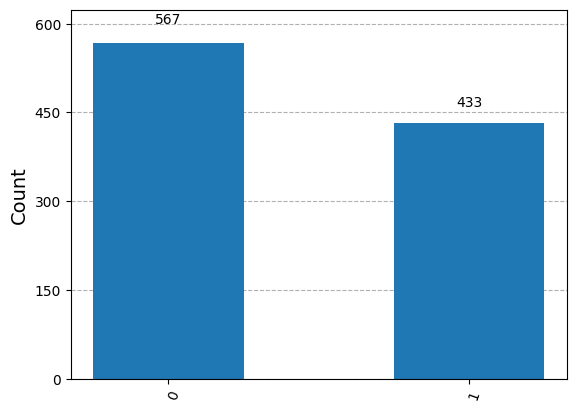

In [30]:
from qiskit.visualization import plot_histogram
statistics = v.sample_counts(1000)
display(statistics)
plot_histogram(statistics)

Running the cell multiple times and trying different numbers of samples in place of 1000 may be helpful for developing intuition for how the number of trails influences the estimated probabilities.

performing operations with operator and statevector

Unitary operations can be defined and performed on state vectors in Qiskit using the Operator class, as in the example that follows.

In [37]:
from qiskit.quantum_info import Operator

In [38]:
X = Operator([[0,1], [1,0]])
Y = Operator([[0,-1.0j], [1.0j,0]])
Z = Operator([[1,0], [0, -1]])
H = Operator([[1/sqrt(2), 1/sqrt(2)], [1/sqrt(2) , -1/sqrt(2)]])
S = Operator([[1,0], [0,1.0j]])
T = Operator([[1,0], [0, (1+1.0j)/sqrt(2)]])

In [39]:
v.draw("text")

[ 0.33333333+0.66666667j,-0.66666667+0.j        ]

In [40]:
from qiskit import QuantumCircuit

In [41]:
circuit = QuantumCircuit(1)

In [42]:
circuit.h(0)
circuit.t(0)
circuit.h(0)
circuit.t(0)
circuit.z(0)

In [43]:
circuit.draw()

┌───┐┌───┐┌───┐┌───┐┌───┐
q: ┤ H ├┤ T ├┤ H ├┤ T ├┤ Z ├
   └───┘└───┘└───┘└───┘└───┘

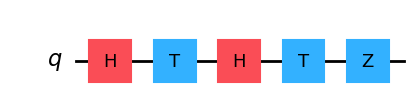

In [45]:
circuit.draw('mpl')

The operations are applied sequentially, starting on the left and ending on the right in the figure. Let us first initialize a starting quantum state vector and then evolve that state according to the sequence of operations

In [46]:
ket0 = Statevector([1,0])
v = ket0.evolve(circuit)
v.draw("text")

[ 0.85355339+0.35355339j,-0.35355339+0.14644661j]

Finally, lets simulate the result of running this experiment (preparing the state ket Zero , applying the sequence of operations represented by the circuit, and measuring) 4000 times

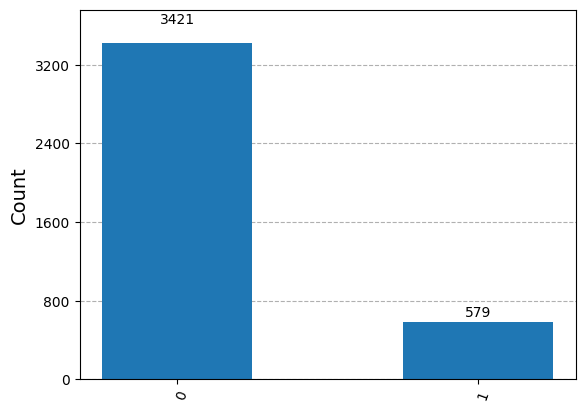

In [47]:
statistics = v.sample_counts(4000)
plot_histogram(statistics)

In [2]:
Aer.backends()

NameError: name 'Aer' is not defined